<a href="https://colab.research.google.com/github/ibonetc/Inteligencia_Artificial/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [0]:
n_samples = 1000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.9)
blobs = datasets.make_blobs(n_samples=n_samples,cluster_std=1.0, random_state=7)
no_structure = np.random.rand(n_samples, 2), None

In [0]:
X,Y=noisy_circles

In [0]:
X = StandardScaler().fit_transform(X) #Normalizar los datos

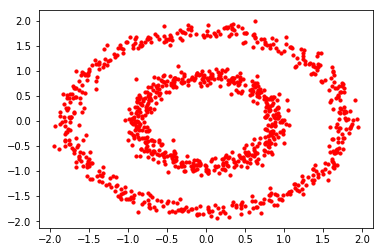

In [10]:
plt.scatter(X[:, 0], X[:, 1], s=10, c="red" )

In [0]:
k=2

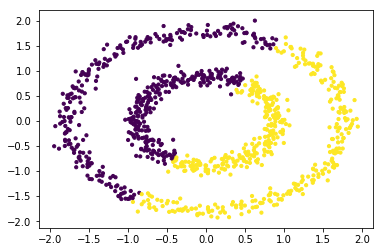

In [15]:
k_means=cluster.KMeans(n_clusters=k,random_state=7)
y_pred=k_means.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

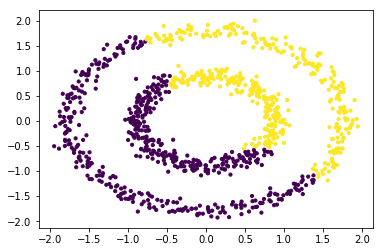

In [17]:
ward = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')# linkage='single'
y_pred=ward.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

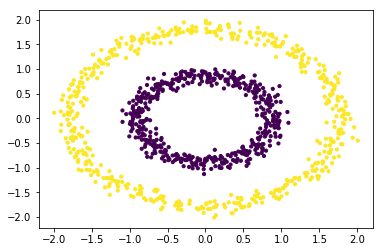

In [0]:
dbscan = cluster.DBSCAN(eps=.3)
dbscan.fit(X)
y_pred=dbscan.labels_.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

# Comparando algunos métodos de clustering con bases de datos distribuidas con diferente forma

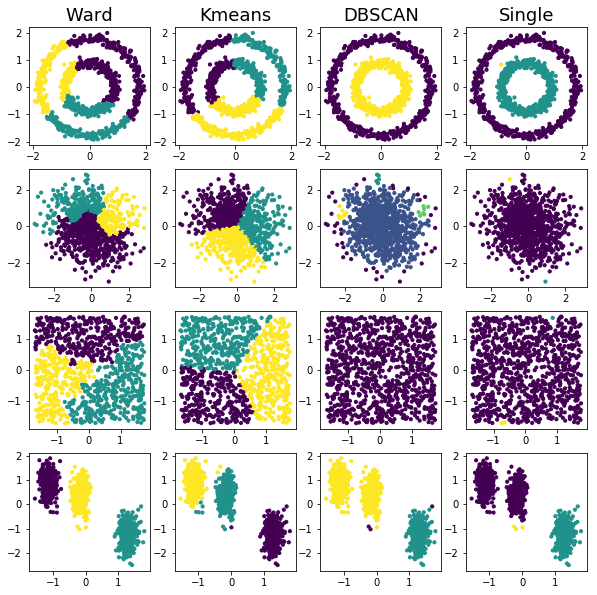

In [19]:
datasets = [noisy_circles, noisy_moons,no_structure,blobs]
k=3
index_plot=1
plt.figure(figsize=(10,10))
for i_dataset, dataset in enumerate(datasets):
  X, y = dataset
  X = StandardScaler().fit_transform(X)
  k_means=cluster.KMeans(n_clusters=k)
  ward = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
  single = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
  dbscan = cluster.DBSCAN(eps=.3)
  cluster_methods=(('Ward', ward),('Kmeans', k_means),('DBSCAN', dbscan),('Single',single))
  for name, algorithm in cluster_methods:
    algorithm.fit(X)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
    plt.subplot(len(datasets), len(cluster_methods), index_plot)
    if i_dataset == 0:
            plt.title(name, size=18)

    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
    index_plot+=1
plt.show()